In [22]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [23]:
onecall = True  # 8 days
#onecall = False # 5 days

In [24]:

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(base_url).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [25]:

API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
lat, lon = get_location()
base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '8 days'
# request data
try:
    print('Requesting json data')
    onecall_data = requests.get(base_url).json()
    #print(onecall_data)
except:
    exit()

Requesting json data


In [26]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = onecall_data['daily']
l = len(df[0])


Creating dataframe:  8 days


In [27]:
_8days = pd.DataFrame.from_records(df)
print('Converting timestamp to human date')
for k in _8days.keys()[:5]:
    #print(k)
    if k=='dt':  # date for dt
        _8days[k] = _8days[k].apply(get_date)
    else:        # time for other columns
        _8days[k] = _8days[k].apply(get_time)            
_8days

Converting timestamp to human date


,dt,sunrise,sunset,moonrise,moonset,moon_phase,temp,feels_like,pressure,humidity,dew_point,wind_speed,wind_deg,wind_gust,weather,clouds,pop,uvi,rain
0,02/09,07:09,20:31,06:10,20:32,0.98,"{'day': 23.83, 'min': 19.73, 'max': 27.56, 'ni...","{'day': 23.99, 'night': 22.46, 'eve': 26.75, '...",1013,66,17.10,3.94,202,8.14,"[{'id': 802, 'main': 'Clouds', 'description': ...",40,0.00,5.23,NaN
1,03/09,07:10,20:29,07:20,20:46,0.00,"{'day': 23.4, 'min': 19.36, 'max': 24.41, 'nig...","{'day': 22.92, 'night': 20.84, 'eve': 21.78, '...",1015,43,9.99,4.02,226,5.97,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.74,4.56,0.65
2,04/09,07:12,20:27,08:27,20:58,0.04,"{'day': 22.93, 'min': 17.78, 'max': 25.11, 'ni...","{'day': 22.56, 'night': 19.11, 'eve': 22.46, '...",1019,49,11.56,4.58,4,7.18,"[{'id': 803, 'main': 'Clouds', 'description': ...",79,0.00,4.79,NaN
3,05/09,07:13,20:25,09:34,21:09,0.07,"{'day': 19.77, 'min': 14.31, 'max': 21.53, 'ni...","{'day': 18.9, 'night': 15.85, 'eve': 18.81, 'm...",1021,42,6.45,4.14,16,8.17,"[{'id': 803, 'main': 'Clouds', 'description': ...",67,0.00,4.17,NaN
4,06/09,07:14,20:23,10:40,21:22,0.10,"{'day': 17.47, 'min': 15.64, 'max': 17.93, 'ni...","{'day': 17.28, 'night': 16.9, 'eve': 17.25, 'm...",1014,77,13.17,3.82,239,8.55,"[{'id': 500, 'main': 'Rain', 'description': 'l...",100,0.20,5.16,0.29
5,07/09,07:16,20:21,11:49,21:37,0.13,"{'day': 20.1, 'min': 16.81, 'max': 22.37, 'nig...","{'day': 19.58, 'night': 16.01, 'eve': 18.18, '...",1015,54,10.46,4.82,325,7.10,"[{'id': 500, 'main': 'Rain', 'description': 'l...",94,0.20,6.00,0.39
6,08/09,07:17,20:18,12:59,21:55,0.16,"{'day': 21.08, 'min': 14.3, 'max': 22.92, 'nig...","{'day': 20.16, 'night': 17.65, 'eve': 20.31, '...",1020,35,4.88,3.42,334,5.14,"[{'id': 800, 'main': 'Clear', 'description': '...",1,0.00,6.00,NaN
7,09/09,07:19,20:16,14:11,22:18,0.19,"{'day': 23.04, 'min': 14.86, 'max': 24.61, 'ni...","{'day': 22.5, 'night': 19.84, 'eve': 22.5, 'mo...",1023,42,9.36,1.72,329,3.84,"[{'id': 802, 'main': 'Clouds', 'description': ...",34,0.00,6.00,NaN


In [28]:
_8days.keys(), len(_8days.keys())

(Index(['dt', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'temp',
        'feels_like', 'pressure', 'humidity', 'dew_point', 'wind_speed',
        'wind_deg', 'wind_gust', 'weather', 'clouds', 'pop', 'uvi', 'rain'],
       dtype='object'),
 19)

In [29]:

print('Selecting columns')
# select multiple column ranges
focus = np.r_[:6, 8:14, 16:l]
focus_idx = _8days.keys()[focus]

status2 = pd.DataFrame(_8days[focus_idx])
demain = status2.loc[1]

demain

Selecting columns


dt            03/09
sunrise       07:10
sunset        20:29
moonrise      07:20
moonset       20:46
moon_phase      0.0
pressure       1015
humidity         43
dew_point      9.99
wind_speed     4.02
wind_deg        226
wind_gust      5.97
pop            0.74
uvi            4.56
Name: 1, dtype: object

In [30]:
focus

array([ 0,  1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 16, 17])

In [31]:
# zip and save
print('Save to CSV')
compression_opts = dict(method='zip', archive_name='demain.csv')
demain.to_csv('demain.zip', index=False, compression=compression_opts)
# no compression 
demain.to_csv('demain.csv')
#pprint(onecall_data)
print(_8days.iloc[0])  # today


Save to CSV
dt                                                        02/09
sunrise                                                   07:09
sunset                                                    20:31
moonrise                                                  06:10
moonset                                                   20:32
moon_phase                                                 0.98
temp          {'day': 23.83, 'min': 19.73, 'max': 27.56, 'ni...
feels_like    {'day': 23.99, 'night': 22.46, 'eve': 26.75, '...
pressure                                                   1013
humidity                                                     66
dew_point                                                  17.1
wind_speed                                                 3.94
wind_deg                                                    202
wind_gust                                                  8.14
weather       [{'id': 802, 'main': 'Clouds', 'description': ...
clouds                      

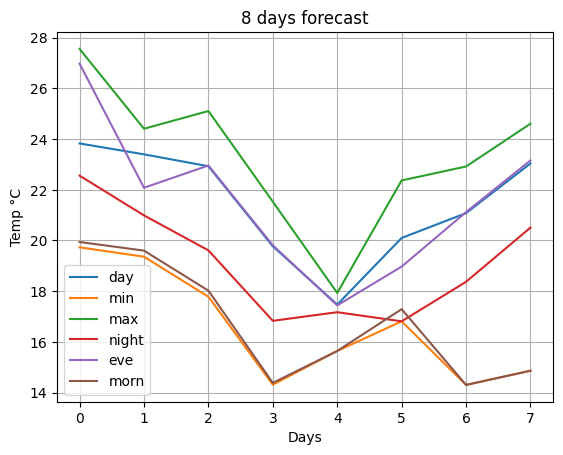

In [32]:
# plot temperature
l = []
for i in range(0,8):
    l.append(_8days.iloc[i].temp)

df = pd.DataFrame(l)
df.plot()
plt.title('8 days forecast')
plt.ylabel('Temp °C')
plt.xlabel('Days')
plt.grid()
plt.show()

   
# 5 days forecast


In [33]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(base_url).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1725278400, 'main': {'temp': 23.83, 'feels_like': 23.99, 'temp_min': 23.83, 'temp_max': 26.61, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 1003, 'humidity': 66, 'temp_kf': -2.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'clouds': {'all': 40}, 'wind': {'speed': 3.75, 'deg': 202, 'gust': 5.12}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-02 12:00:00'}, {'dt': 1725289200, 'main': {'temp': 25.14, 'feels_like': 25.17, 'temp_min': 25.14, 'temp_max': 27.76, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 1002, 'humidity': 56, 'temp_kf': -2.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'clouds': {'all': 31}, 'wind': {'speed': 3.83, 'deg': 210, 'gust': 4.71}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-02 15:00:00'}, {'dt': 1725300000, 'main': {'temp'

In [34]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1725278400
main          {'temp': 23.83, 'feels_like': 23.99, 'temp_min...
weather       [{'id': 802, 'main': 'Clouds', 'description': ...
clouds                                              {'all': 40}
wind                  {'speed': 3.75, 'deg': 202, 'gust': 5.12}
visibility                                                10000
pop                                                         0.0
sys                                                {'pod': 'd'}
dt_txt                                      2024-09-02 12:00:00
rain                                                        NaN
Name: 0, dtype: object


In [35]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'sys',
       'dt_txt', 'rain'],
      dtype='object')

In [36]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   02/09 14:00  14:00     26.61     23.83
1   02/09 17:00  17:00     27.76     25.14
2   02/09 20:00  20:00     26.40     25.54
3   02/09 23:00  23:00     22.56     22.56
4   03/09 02:00  02:00     21.60     21.60
5   03/09 05:00  05:00     20.49     20.49
6   03/09 08:00  08:00     19.37     19.37
7   03/09 11:00  11:00     20.99     20.99
8   03/09 14:00  14:00     24.41     24.41
9   03/09 17:00  17:00     22.18     22.18
10  03/09 20:00  20:00     21.85     21.85
11  03/09 23:00  23:00     20.99     20.99
12  04/09 02:00  02:00     19.19     19.19
13  04/09 05:00  05:00     18.33     18.33
14  04/09 08:00  08:00     17.78     17.78
15  04/09 11:00  11:00     20.57     20.57
16  04/09 14:00  14:00     24.05     24.05
17  04/09 17:00  17:00     25.07     25.07
18  04/09 20:00  20:00     22.18     22.18
19  04/09 23:00  23:00     19.61     19.61
20  05/09 02:00  02:00     16.80     16.80
21  05/09 05:00  05:00     15.23     15.23
22  05/09 0

In [37]:
_5days['human_date']

0     02/09 14:00
1     02/09 17:00
2     02/09 20:00
3     02/09 23:00
4     03/09 02:00
5     03/09 05:00
6     03/09 08:00
7     03/09 11:00
8     03/09 14:00
9     03/09 17:00
10    03/09 20:00
11    03/09 23:00
12    04/09 02:00
13    04/09 05:00
14    04/09 08:00
15    04/09 11:00
16    04/09 14:00
17    04/09 17:00
18    04/09 20:00
19    04/09 23:00
20    05/09 02:00
21    05/09 05:00
22    05/09 08:00
23    05/09 11:00
24    05/09 14:00
25    05/09 17:00
26    05/09 20:00
27    05/09 23:00
28    06/09 02:00
29    06/09 05:00
30    06/09 08:00
31    06/09 11:00
32    06/09 14:00
33    06/09 17:00
34    06/09 20:00
35    06/09 23:00
36    07/09 02:00
37    07/09 05:00
38    07/09 08:00
39    07/09 11:00
Name: human_date, dtype: object

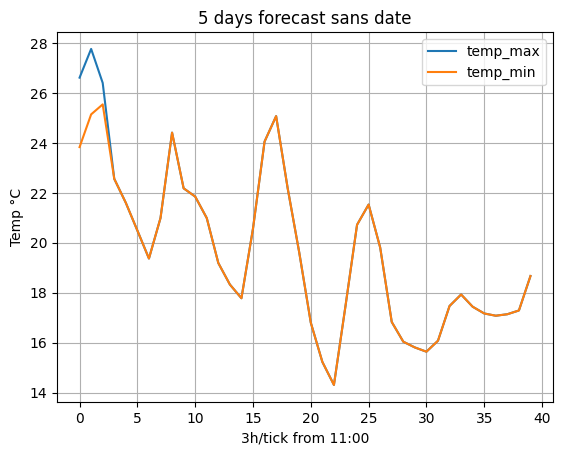

In [38]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [39]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

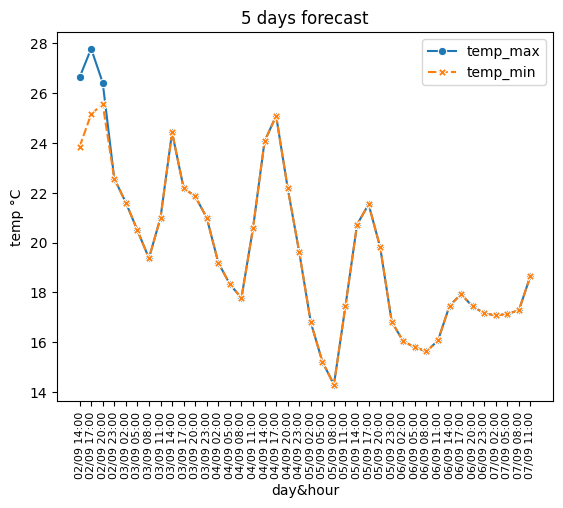

In [40]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

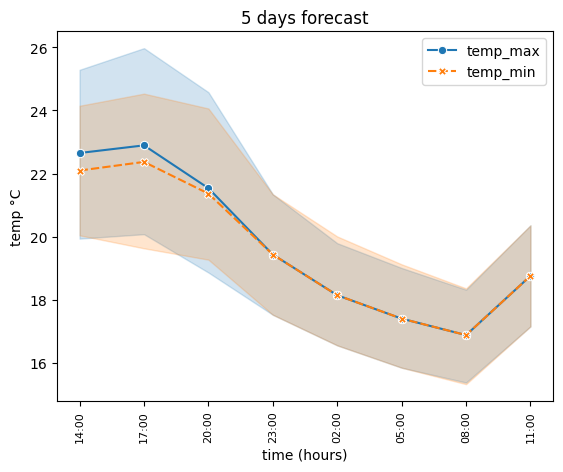

In [41]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 